In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import isdir

%matplotlib inline

In [17]:
DATA_FOLDER = '../raw/'
TACTILE_FILE_NAME = 'tactile.tac'

ALLOWED_OBJECTS = ['cheezit', 'coffee']

In [27]:
def study_pdc(finger):
    pdc_col = -1
    
    if finger == 'MF':
        pdc_col = [27]
    elif finger == 'TH':
        pdc_col = [56]
    
    files = listdir(DATA_FOLDER)
    folders = [element for element in files if isdir(DATA_FOLDER + element) and element in ALLOWED_OBJECTS]
    print(folders)
    
    objects_tacs = []
    count = 0

    for folder in folders:        
        subfolders = listdir(DATA_FOLDER + folder + '/')
        root_path = DATA_FOLDER + folder + '/'

        print('> EXPLORING', root_path)

        some_tacs = []

        for subfolder in subfolders:
            count += 1

            tac_path = root_path + subfolder + '/' + TACTILE_FILE_NAME
            tac_pd = pd.read_csv(tac_path, header=None, usecols=pdc_col)
            some_tacs.append(tac_pd.values[0][0])

        objects_tacs.append(some_tacs)

    print('Found files:', count)
    
    min_val = np.min(np.min(objects_tacs))
    max_val = np.max(np.max(objects_tacs))

    print('Range: (', min_val, ',', max_val, ')')

    objects = len(folders)
    f = plt.figure(figsize=(10,8))

    for i in range(objects):
        # objects, 2 columns, ith plot
        ax = f.add_subplot(objects * 100 + 20 + i + 1)
        ax.hist(objects_tacs[i], range=(min_val, max_val))
        ax.set_title(folders[i])
        
    f.savefig(finger + '-PDC.svg')

['cheezit', 'coffee']
> EXPLORING ../raw/cheezit/
> EXPLORING ../raw/coffee/
Found files: 120
Range: ( 1694 , 1986 )


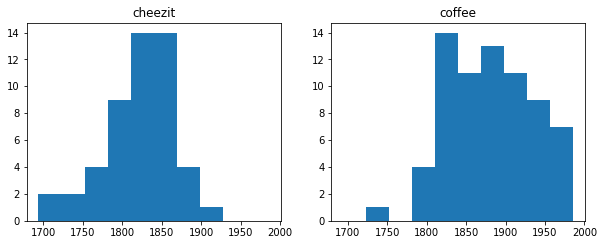

In [28]:
study_pdc('MF')

['cheezit', 'coffee']
> EXPLORING ../raw/cheezit/
> EXPLORING ../raw/coffee/
Found files: 120
Range: ( 2752 , 2949 )


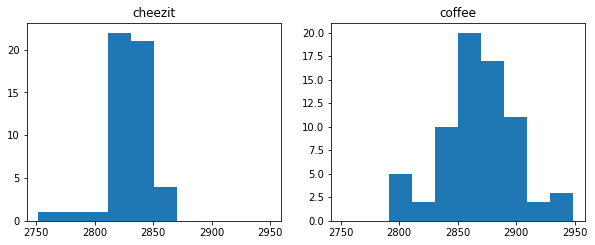

In [29]:
study_pdc('TH')

In [7]:
def study_electrodes(finger):
    pdc_col = -1

    if finger == 'MF':
        pdc_col = list(range(1, 25)) # 24 electrodes
    elif finger == 'TH':
        pdc_col = list(range(30, 53)) # 24 electrodes

    print(pdc_col)

    files = listdir(DATA_FOLDER)
    folders = [element for element in files if isdir(DATA_FOLDER + element)]
    print(folders)

    objects_tacs = []
    count = 0

    for folder in folders:
        subfolders = listdir(DATA_FOLDER + folder + '/')
        root_path = DATA_FOLDER + folder + '/'

        print('> EXPLORING', root_path)

        some_tacs = []

        for subfolder in subfolders:
            count += 1

            tac_path = root_path + subfolder + '/' + TACTILE_FILE_NAME
            tac_pd = pd.read_csv(tac_path, header=None, usecols=pdc_col)
            some_tacs.append(tac_pd.values[0])

        objects_tacs.append(some_tacs)

    print('Found files:', count)

    min_vals = []
    max_vals = []

    for i in range(len(folders)):
        min_vals.append(np.min(objects_tacs[i]))
        max_vals.append(np.max(objects_tacs[i]))

    min_val = np.min(min_vals)
    max_val = np.max(max_vals)

    print('Range: (', min_val, ',', max_val, ')')

    objects = len(folders)
    f = plt.figure(figsize=(30,30))

    for i in range(objects):
        # objects, 2 columns, ith plot
        ax = f.add_subplot(objects * 100 + 20 + i + 1)
        ax.hist(objects_tacs[i], range=(min_val, max_val))
        ax.set_title(folders[i])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
['pringles', 'cheezit', 'ball', 'coffee', 'sugar', 'sponge']
> EXPLORING ../raw/pringles/
> EXPLORING ../raw/cheezit/
> EXPLORING ../raw/ball/
> EXPLORING ../raw/coffee/
> EXPLORING ../raw/sugar/
> EXPLORING ../raw/sponge/
Found files: 285
Range: ( 2209 , 3747 )


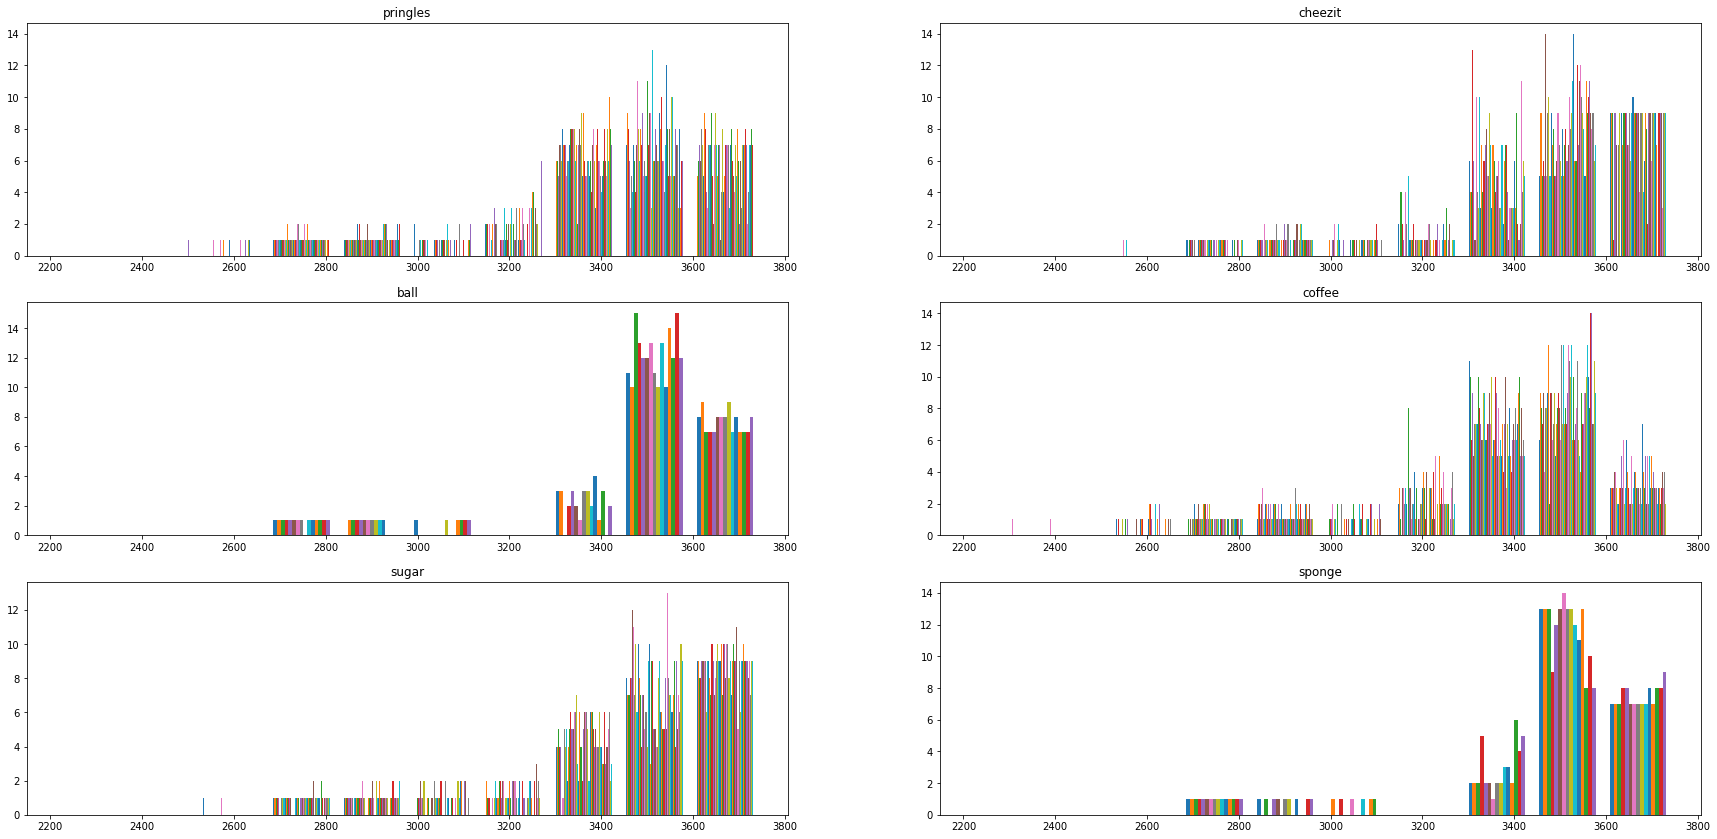

In [8]:
study_electrodes('MF')

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
['pringles', 'cheezit', 'ball', 'coffee', 'sugar', 'sponge']
> EXPLORING ../raw/pringles/
> EXPLORING ../raw/cheezit/
> EXPLORING ../raw/ball/
> EXPLORING ../raw/coffee/
> EXPLORING ../raw/sugar/
> EXPLORING ../raw/sponge/
Found files: 285
Range: ( 1517 , 3484 )


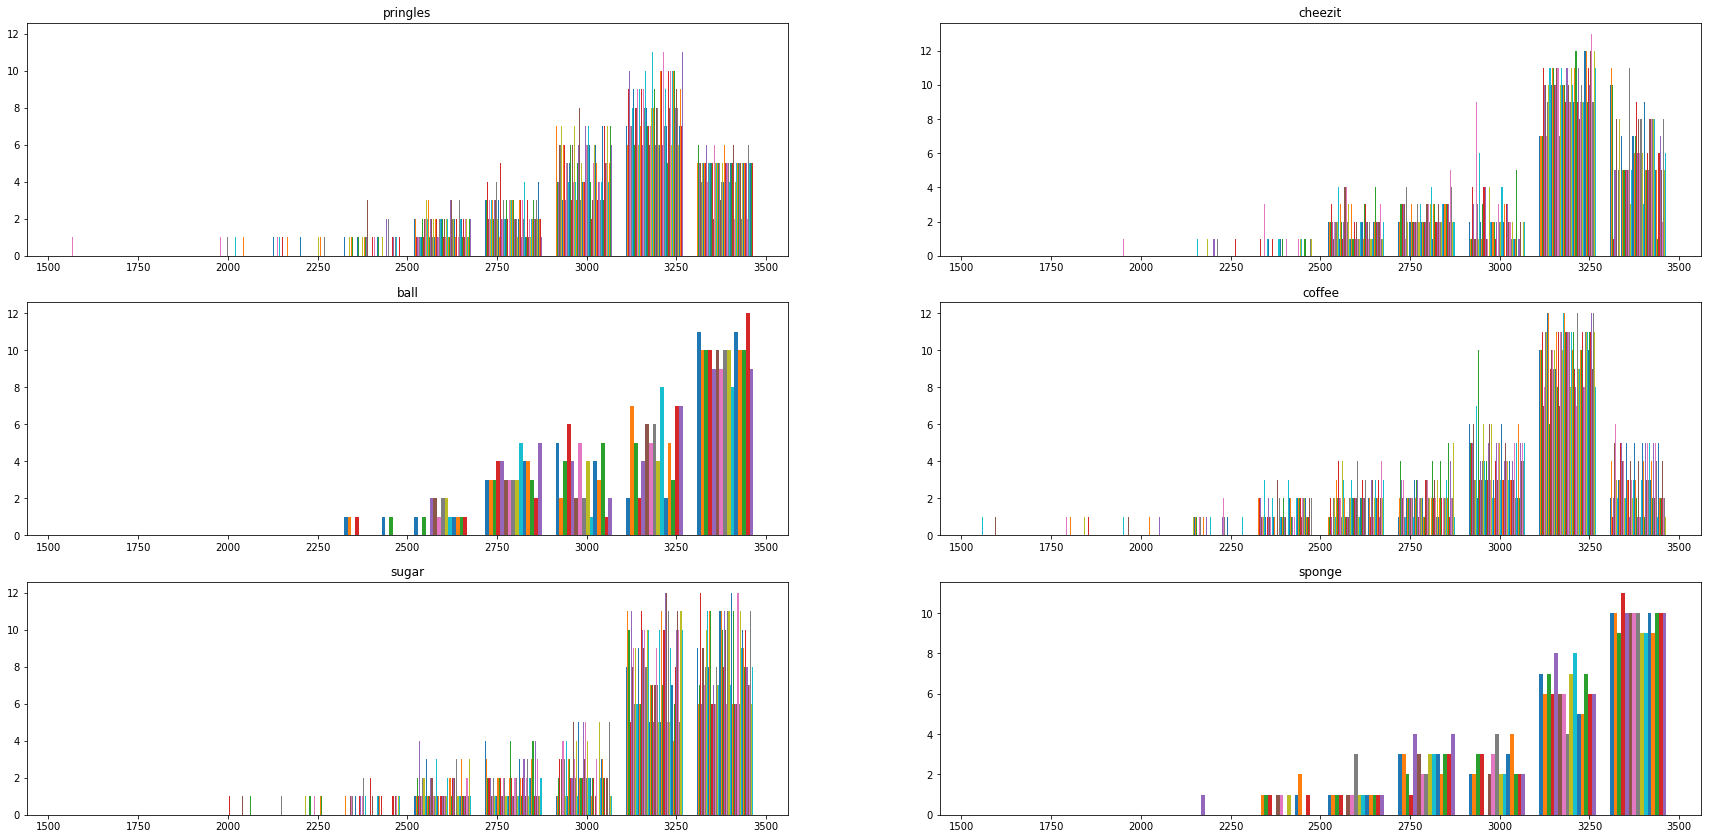

In [9]:
study_electrodes('TH')